# Working With Time Series in Pandas

## Imports

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 20

import warnings
warnings.filterwarnings('ignore')

## Converting to DateTime Type

![I have a Date!](https://media2.giphy.com/media/W2heDDJSLC0thGO7Ld/giphy.gif?cid=ecf05e472da7nf00vbh7xp4lqxyszvszjojoc2qw3uthsz4s&rid=giphy.gif&ct=g)

### But how do I get pandas to understand it and work with it

In [2]:
pd.to_datetime('Jan 1 1970')

Timestamp('1970-01-01 00:00:00')

### But sometime pandas isn't able to infer the format of our date

In [3]:
try:
    pd.to_datetime('Jan:1:1970')
except ValueError as e:
    print('ValueError', e)

ValueError Unknown string format: Jan:1:1970


### So we need to tell pandas what the foramt is

In [4]:
pd.to_datetime('Jan:1:1970', format='%b:%d:%Y')

Timestamp('1970-01-01 00:00:00')

#### There are all sorts of format codes and you can find them here: [Python date format codes](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)

### Now what about a whole column of dates?

In [5]:
url = "https://gist.githubusercontent.com/ryanorsinger/b309f8db19e0ca71b213d4877d835e77/raw/f5841017310e2f4ca070b313529ceec2375336ba/coffee_consumption.csv"
df = pd.read_csv(url)
df

,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563
...,...,...
256,2019-12-25,12.250875
257,2019-12-26,7.513206
258,2019-12-27,9.464345
259,2019-12-30,14.623106


In [6]:
df.dtypes

date                   object
coffee_consumption    float64
dtype: object

In [7]:
type(df.iloc[1]['date'])

str

In [8]:
df.date = pd.to_datetime(df.date)
df.dtypes

date                  datetime64[ns]
coffee_consumption           float64
dtype: object

## Working with DateTime Series

In [9]:
df.date

0     2019-01-01
1     2019-01-02
2     2019-01-03
3     2019-01-04
4     2019-01-07
         ...    
256   2019-12-25
257   2019-12-26
258   2019-12-27
259   2019-12-30
260   2019-12-31
Name: date, Length: 261, dtype: datetime64[ns]

### `.dt` allows us to extract parts of the date

In [10]:
df.date.dt.year

0      2019
1      2019
2      2019
3      2019
4      2019
       ... 
256    2019
257    2019
258    2019
259    2019
260    2019
Name: date, Length: 261, dtype: int64

In [11]:
df.date.dt.month

0       1
1       1
2       1
3       1
4       1
       ..
256    12
257    12
258    12
259    12
260    12
Name: date, Length: 261, dtype: int64

In [12]:
df.date.dt.day

0       1
1       2
2       3
3       4
4       7
       ..
256    25
257    26
258    27
259    30
260    31
Name: date, Length: 261, dtype: int64

In [13]:
df.date.dt.day_name()

0        Tuesday
1      Wednesday
2       Thursday
3         Friday
4         Monday
         ...    
256    Wednesday
257     Thursday
258       Friday
259       Monday
260      Tuesday
Name: date, Length: 261, dtype: object

### Since they are returned as a Series, we can add them back as columns

In [14]:
df['year'] = df.date.dt.year
df

,date,coffee_consumption,year
0,2019-01-01,14.301915,2019
1,2019-01-02,12.905900,2019
2,2019-01-03,10.046015,2019
3,2019-01-04,6.354805,2019
4,2019-01-07,8.545563,2019
...,...,...,...
256,2019-12-25,12.250875,2019
257,2019-12-26,7.513206,2019
258,2019-12-27,9.464345,2019
259,2019-12-30,14.623106,2019


In [15]:
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['weekday'] = df.date.dt.day_name()
df.head()

,date,coffee_consumption,year,month,day,weekday
0,2019-01-01,14.301915,2019,1,1,Tuesday
1,2019-01-02,12.905900,2019,1,2,Wednesday
2,2019-01-03,10.046015,2019,1,3,Thursday
3,2019-01-04,6.354805,2019,1,4,Friday
4,2019-01-07,8.545563,2019,1,7,Monday


## Working with more complicated data

In [16]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1kTrAFSrr-xP3REs0Lly0TdV4ekrHahBXLg9r5qKxmV8/edit#gid=0'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df = pd.read_csv(csv_export_url)
df.columns = df.columns.str.lower()
df

,date,symbol,close,volume
0,2020-03-13 12-PM,ETHUSD,128.71,3906590.52
1,2020-03-13 12-AM,ETHUSD,129.94,10329663.70
2,2020-03-13 11-AM,ETHUSD,119.51,3311080.29
3,2020-03-13 10-AM,ETHUSD,124.47,3483436.48
4,2020-03-13 09-AM,ETHUSD,124.08,2767584.44
...,...,...,...,...
23669,2017-07-01 05-PM,ETHUSD,272.57,1894983.33
23670,2017-07-01 04-PM,ETHUSD,265.74,1287300.75
23671,2017-07-01 03-PM,ETHUSD,268.79,1500282.55
23672,2017-07-01 02-PM,ETHUSD,274.83,1702536.85


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23674 entries, 0 to 23673
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    23674 non-null  object 
 1   symbol  23674 non-null  object 
 2   close   23674 non-null  float64
 3   volume  23674 non-null  float64
dtypes: float64(2), object(2)
memory usage: 739.9+ KB


<AxesSubplot:>

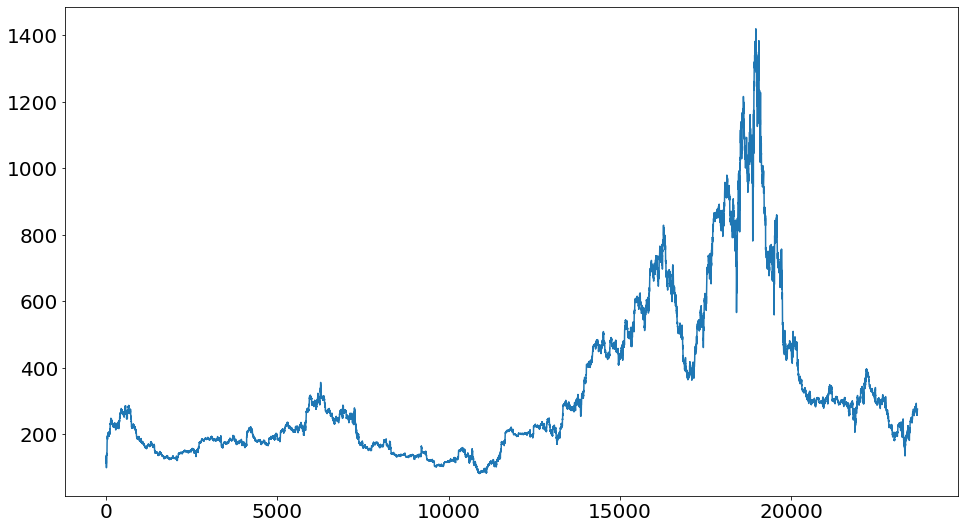

In [18]:
df.close.plot()

### How do we make pandas time aware so we can utilize the built in functionality for time series analysis?

#### 3 steps

* Convert 'date/time' column to datetime object in Pandas (pd.to_datetime())
* Set the datetime column as Index
* Sort the datetime index

### Convert to datetime

In [19]:
df.dtypes

date       object
symbol     object
close     float64
volume    float64
dtype: object

In [20]:
try:
    pd.to_datetime(df.date)
except ValueError as e:
    print('ValueError', e)

ValueError Unknown string format: 2020-03-13 12-PM


#### So what is happening?

Pandas is telling us it is unable to infer what our date format is.

2020-03-13 12-PM is what our date looks like.

It is made up of several parts:

* a 4 digit year: `%Y`
* followed by a hyphen `-`
* a two digit month: `%m`
* followed by a hyphen `-`
* a two digit day: `%d`
* a space ` `
* a 12-hour clock number: `%I`
* a hyphen `-`
* an AM/PM `%p`

With this info we can now build our format string:

`2020-03-13 12-PM`

`%Y-%m-%d %I-%p`

In [21]:
pd.to_datetime('2020-03-13 12-PM', format='%Y-%m-%d %I-%p')

Timestamp('2020-03-13 12:00:00')

In [22]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d %I-%p')

In [23]:
df

,date,symbol,close,volume
0,2020-03-13 12:00:00,ETHUSD,128.71,3906590.52
1,2020-03-13 00:00:00,ETHUSD,129.94,10329663.70
2,2020-03-13 11:00:00,ETHUSD,119.51,3311080.29
3,2020-03-13 10:00:00,ETHUSD,124.47,3483436.48
4,2020-03-13 09:00:00,ETHUSD,124.08,2767584.44
...,...,...,...,...
23669,2017-07-01 17:00:00,ETHUSD,272.57,1894983.33
23670,2017-07-01 16:00:00,ETHUSD,265.74,1287300.75
23671,2017-07-01 15:00:00,ETHUSD,268.79,1500282.55
23672,2017-07-01 14:00:00,ETHUSD,274.83,1702536.85


In [24]:
df.dtypes

date      datetime64[ns]
symbol            object
close            float64
volume           float64
dtype: object

### Now we can set date to the index and sort the index

In [25]:
df = df.set_index('date').sort_index()
df

,symbol,close,volume
date,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87
2017-07-01 12:00:00,ETHUSD,263.12,824362.87
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55
...,...,...,...
2020-03-13 16:00:00,ETHUSD,127.57,4461424.71
2020-03-13 17:00:00,ETHUSD,133.80,2753450.92
2020-03-13 18:00:00,ETHUSD,128.93,4898735.81


<AxesSubplot:xlabel='date'>

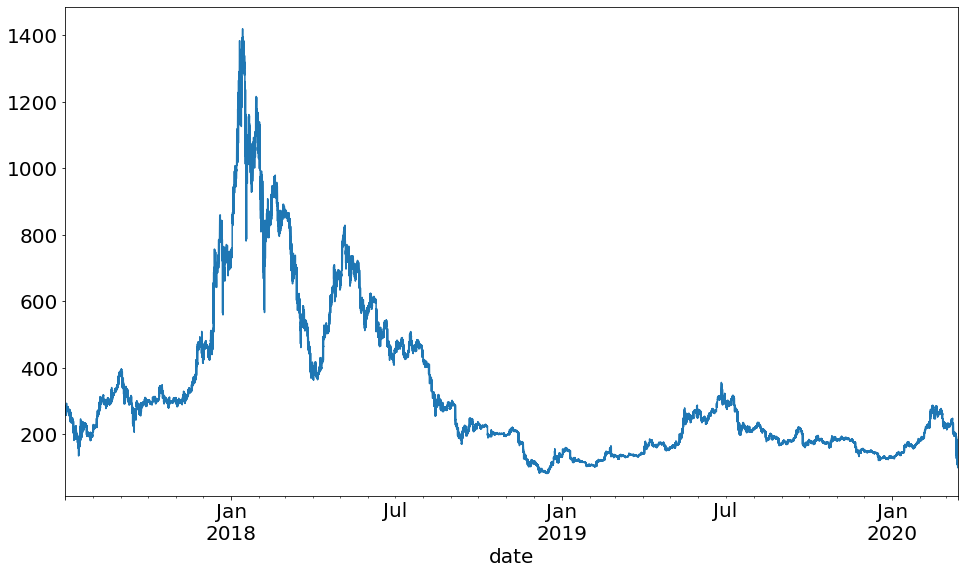

In [26]:
df.close.plot()

### Let's look at the the mean on each day of the week

#### [Pandas datetimeIndex attributes](https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html)

In [27]:
df.index.day_name()

Index(['Saturday', 'Saturday', 'Saturday', 'Saturday', 'Saturday', 'Saturday',
       'Saturday', 'Saturday', 'Saturday', 'Saturday',
       ...
       'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday',
       'Friday', 'Friday', 'Friday'],
      dtype='object', name='date', length=23674)

In [28]:
df['weekday_name'] = df.index.day_name()

In [29]:
df

,symbol,close,volume,weekday_name
date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday
...,...,...,...,...
2020-03-13 16:00:00,ETHUSD,127.57,4461424.71,Friday
2020-03-13 17:00:00,ETHUSD,133.80,2753450.92,Friday
2020-03-13 18:00:00,ETHUSD,128.93,4898735.81,Friday


In [30]:
df.groupby('weekday_name').mean()

,close,volume
weekday_name,,
Friday,321.134596,2.135718e+06
Monday,326.186823,1.913387e+06
Saturday,327.707441,1.455576e+06
Sunday,326.316418,1.453492e+06
Thursday,323.334524,2.250669e+06
Tuesday,325.189722,2.355955e+06
Wednesday,324.622361,2.510756e+06


<AxesSubplot:xlabel='weekday_name'>

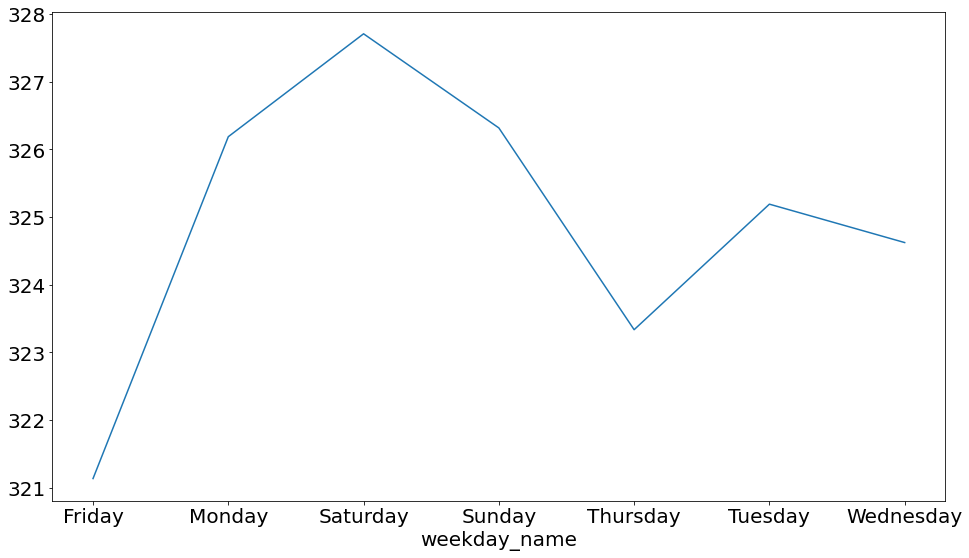

In [31]:
df.groupby('weekday_name').mean().close.plot()

<AxesSubplot:xlabel='weekday_name'>

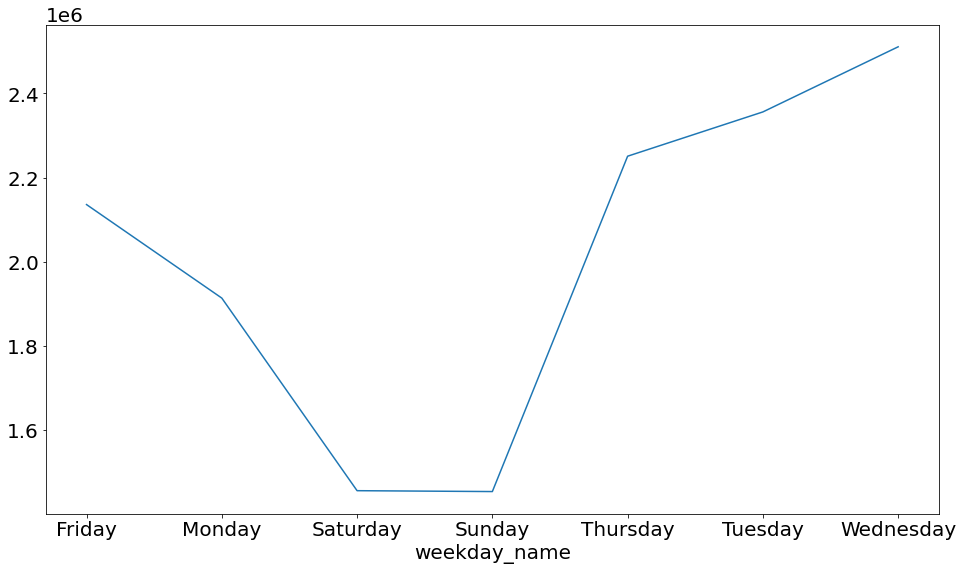

In [32]:
df.groupby('weekday_name').mean().volume.plot()

#### The days are out of order so let's fix that

In [33]:
df.index

DatetimeIndex(['2017-07-01 11:00:00', '2017-07-01 12:00:00',
               '2017-07-01 13:00:00', '2017-07-01 14:00:00',
               '2017-07-01 15:00:00', '2017-07-01 16:00:00',
               '2017-07-01 17:00:00', '2017-07-01 18:00:00',
               '2017-07-01 19:00:00', '2017-07-01 20:00:00',
               ...
               '2020-03-13 11:00:00', '2020-03-13 12:00:00',
               '2020-03-13 13:00:00', '2020-03-13 14:00:00',
               '2020-03-13 15:00:00', '2020-03-13 16:00:00',
               '2020-03-13 17:00:00', '2020-03-13 18:00:00',
               '2020-03-13 19:00:00', '2020-03-13 20:00:00'],
              dtype='datetime64[ns]', name='date', length=23674, freq=None)

In [34]:
df.index.day_of_week

Int64Index([5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
            ...
            4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
           dtype='int64', name='date', length=23674)

In [35]:
df['weekday_number'] = df.index.day_of_week
df

,symbol,close,volume,weekday_name,weekday_number
date,,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday,5
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday,5
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday,5
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday,5
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday,5
...,...,...,...,...,...
2020-03-13 16:00:00,ETHUSD,127.57,4461424.71,Friday,4
2020-03-13 17:00:00,ETHUSD,133.80,2753450.92,Friday,4
2020-03-13 18:00:00,ETHUSD,128.93,4898735.81,Friday,4


In [36]:
df.groupby('weekday_name').mean()

,close,volume,weekday_number
weekday_name,,,
Friday,321.134596,2.135718e+06,4.0
Monday,326.186823,1.913387e+06,0.0
Saturday,327.707441,1.455576e+06,5.0
Sunday,326.316418,1.453492e+06,6.0
Thursday,323.334524,2.250669e+06,3.0
Tuesday,325.189722,2.355955e+06,1.0
Wednesday,324.622361,2.510756e+06,2.0


In [37]:
df.groupby('weekday_name').mean().sort_values('weekday_number')

,close,volume,weekday_number
weekday_name,,,
Monday,326.186823,1.913387e+06,0.0
Tuesday,325.189722,2.355955e+06,1.0
Wednesday,324.622361,2.510756e+06,2.0
Thursday,323.334524,2.250669e+06,3.0
Friday,321.134596,2.135718e+06,4.0
Saturday,327.707441,1.455576e+06,5.0
Sunday,326.316418,1.453492e+06,6.0


<AxesSubplot:xlabel='weekday_name'>

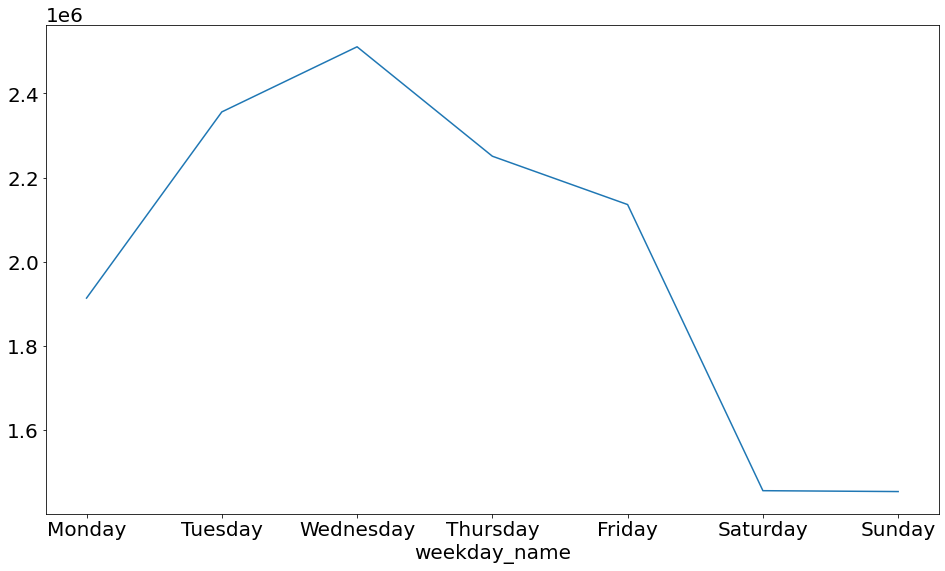

In [38]:
df.groupby('weekday_name').mean().sort_values('weekday_number').volume.plot()

<AxesSubplot:xlabel='weekday_name'>

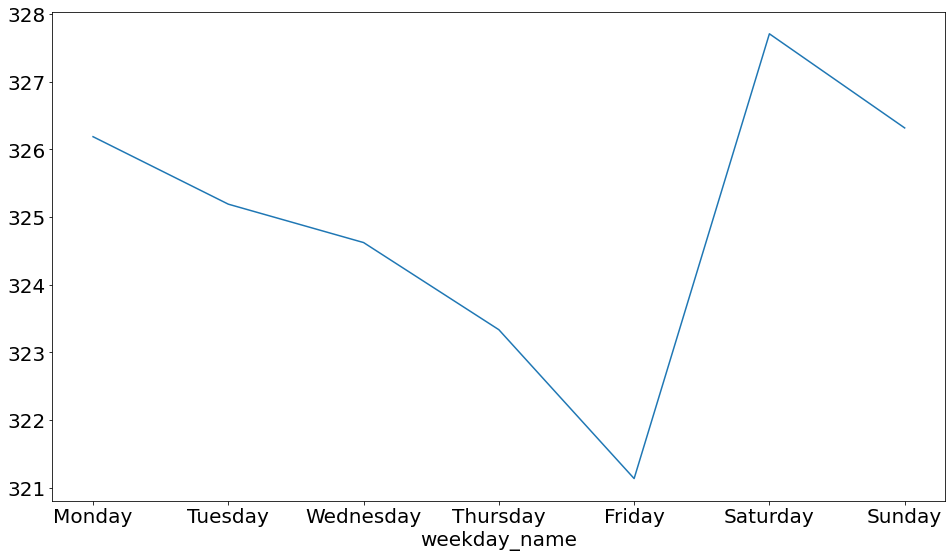

In [39]:
df.groupby('weekday_name').mean().sort_values('weekday_number').close.plot()

![Nice gif](https://c.tenor.com/bEBxkuyFiucAAAAC/yes-nice.gif)

### How do we get a subset of the dataframe?

In [40]:
df.loc['2019-11-19 12:00:00']

symbol               ETHUSD
close                175.73
volume            422881.86
weekday_name        Tuesday
weekday_number            1
Name: 2019-11-19 12:00:00, dtype: object

In [41]:
df['2018':'2019']

,symbol,close,volume,weekday_name,weekday_number
date,,,,,
2018-01-01 00:00:00,ETHUSD,754.42,2697546.48,Monday,0
2018-01-01 01:00:00,ETHUSD,734.59,1886624.01,Monday,0
2018-01-01 02:00:00,ETHUSD,730.01,2950627.37,Monday,0
2018-01-01 03:00:00,ETHUSD,747.90,3461348.11,Monday,0
2018-01-01 04:00:00,ETHUSD,757.86,3180304.69,Monday,0
...,...,...,...,...,...
2019-12-31 19:00:00,ETHUSD,131.10,1169847.84,Tuesday,1
2019-12-31 20:00:00,ETHUSD,129.29,428183.38,Tuesday,1
2019-12-31 21:00:00,ETHUSD,128.83,350155.69,Tuesday,1


In [42]:
df['2018-11']

,symbol,close,volume,weekday_name,weekday_number
date,,,,,
2018-11-01 00:00:00,ETHUSD,197.77,275748.99,Thursday,3
2018-11-01 01:00:00,ETHUSD,196.79,296047.25,Thursday,3
2018-11-01 02:00:00,ETHUSD,196.66,192362.83,Thursday,3
2018-11-01 03:00:00,ETHUSD,196.65,142273.50,Thursday,3
2018-11-01 04:00:00,ETHUSD,197.02,138478.13,Thursday,3
...,...,...,...,...,...
2018-11-30 19:00:00,ETHUSD,112.55,391218.14,Friday,4
2018-11-30 20:00:00,ETHUSD,112.27,400806.50,Friday,4
2018-11-30 21:00:00,ETHUSD,113.31,956181.40,Friday,4


In [43]:
df['2018-01-01': '2018-06-30']

,symbol,close,volume,weekday_name,weekday_number
date,,,,,
2018-01-01 00:00:00,ETHUSD,754.42,2697546.48,Monday,0
2018-01-01 01:00:00,ETHUSD,734.59,1886624.01,Monday,0
2018-01-01 02:00:00,ETHUSD,730.01,2950627.37,Monday,0
2018-01-01 03:00:00,ETHUSD,747.90,3461348.11,Monday,0
2018-01-01 04:00:00,ETHUSD,757.86,3180304.69,Monday,0
...,...,...,...,...,...
2018-06-30 19:00:00,ETHUSD,454.25,715461.94,Saturday,5
2018-06-30 20:00:00,ETHUSD,447.32,889070.47,Saturday,5
2018-06-30 21:00:00,ETHUSD,444.99,378183.34,Saturday,5


In [44]:
df = df.drop(columns=['weekday_name', 'weekday_number'])
df

,symbol,close,volume
date,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87
2017-07-01 12:00:00,ETHUSD,263.12,824362.87
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55
...,...,...,...
2020-03-13 16:00:00,ETHUSD,127.57,4461424.71
2020-03-13 17:00:00,ETHUSD,133.80,2753450.92
2020-03-13 18:00:00,ETHUSD,128.93,4898735.81


### How about changing the period of our data?

#### Downsampling: Reducing Frequency

In [45]:
by_month = df.asfreq('M')
by_month.head()

,symbol,close,volume
date,,,
2017-07-31 11:00:00,ETHUSD,199.96,1058461.41
2017-08-31 11:00:00,ETHUSD,388.19,1189036.71
2017-09-30 11:00:00,ETHUSD,300.37,1002416.23
2017-10-31 11:00:00,ETHUSD,303.45,1014184.66
2017-11-30 11:00:00,ETHUSD,420.42,3367153.22


<AxesSubplot:xlabel='date'>

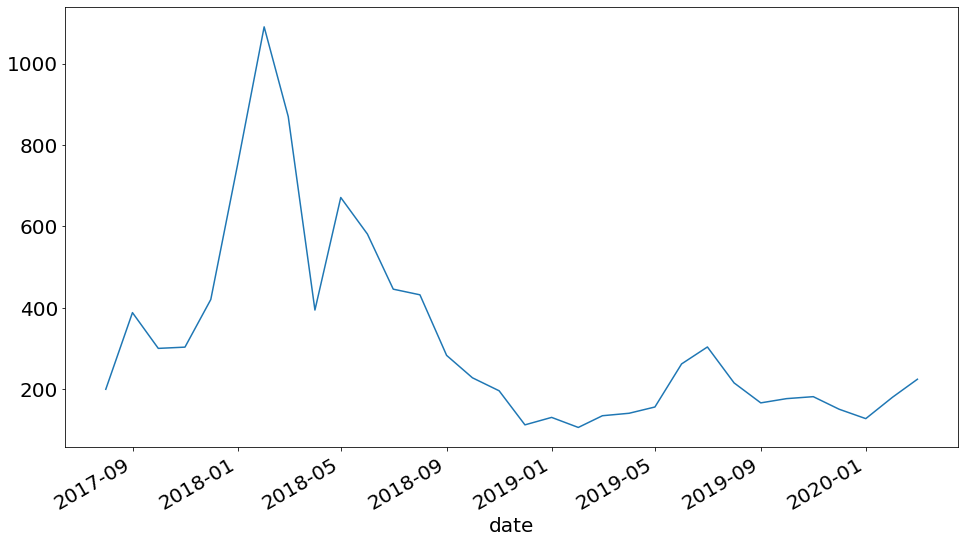

In [46]:
by_month.close.plot()

##### What if I want the first day of the month?

[Pandas asfreq Offset Aliases](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)

[Pandas asfreq Anchored Offsets](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#anchored-offsets)

In [47]:
by_month_first_day = df.asfreq('MS')
by_month_first_day.head()

,symbol,close,volume
date,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87
2017-08-01 11:00:00,ETHUSD,228.84,2302367.30
2017-09-01 11:00:00,ETHUSD,391.83,1649221.80
2017-10-01 11:00:00,ETHUSD,300.76,502473.87
2017-11-01 11:00:00,ETHUSD,289.15,1304555.01


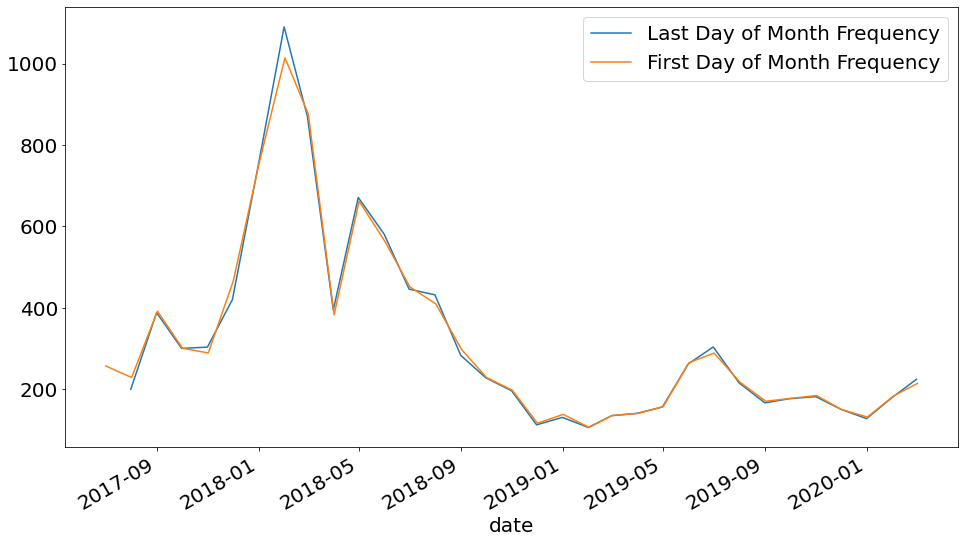

In [48]:
by_month.close.plot(label='Last Day of Month Frequency')
by_month_first_day.close.plot(label='First Day of Month Frequency')
plt.legend()
plt.show()

#### Upsampling: Increasing Frequency

In [49]:
by_half_hour = df.asfreq('30T')
by_half_hour.head(10)

,symbol,close,volume
date,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87
2017-07-01 11:30:00,NaN,NaN,NaN
2017-07-01 12:00:00,ETHUSD,263.12,824362.87
2017-07-01 12:30:00,NaN,NaN,NaN
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99
2017-07-01 13:30:00,NaN,NaN,NaN
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85
2017-07-01 14:30:00,NaN,NaN,NaN
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55


#### As freq allows us to fill in the NaNs with two different methods

In [50]:
by_half_hour.assign(
    ffill=lambda df: df.volume.ffill(),
    bfill=lambda df: df.volume.bfill()
).head()

,symbol,close,volume,ffill,bfill
date,,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,679358.87,679358.87
2017-07-01 11:30:00,NaN,NaN,NaN,679358.87,824362.87
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,824362.87,824362.87
2017-07-01 12:30:00,NaN,NaN,NaN,824362.87,3010787.99
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,3010787.99,3010787.99


In [51]:
by_half_hour = df.asfreq('30T', method='ffill')
by_half_hour.head()

,symbol,close,volume
date,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87
2017-07-01 11:30:00,ETHUSD,257.13,679358.87
2017-07-01 12:00:00,ETHUSD,263.12,824362.87
2017-07-01 12:30:00,ETHUSD,263.12,824362.87
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99


### What about Resampling (Aggregating over time)
   
    * This is similiar to groupby but for dates

In [52]:
daily_df = df.resample('D').mean()
daily_df

,close,volume
date,,
2017-07-01,265.284615,2.198771e+06
2017-07-02,269.782500,2.177595e+06
2017-07-03,278.882083,1.459015e+06
2017-07-04,276.743333,1.254579e+06
2017-07-05,265.025833,1.797923e+06
...,...,...
2020-03-09,200.818333,3.804752e+06
2020-03-10,201.577500,1.553063e+06
2020-03-11,195.910417,1.894868e+06


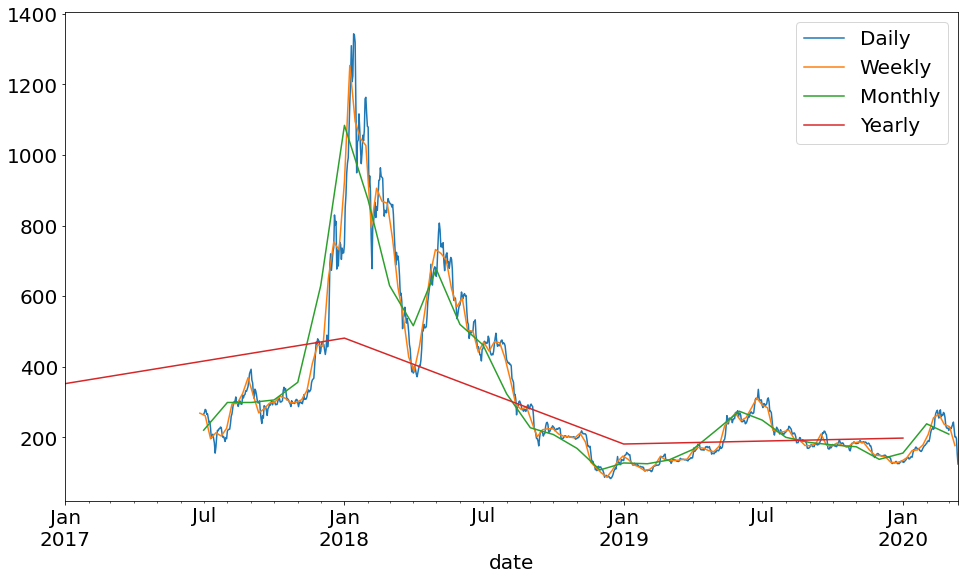

In [53]:
daily_df.close.plot(label='Daily')
df.resample('W').mean().close.plot(label='Weekly')
df.resample('M').mean().close.plot(label='Monthly')
df.resample('Y').mean().close.plot(label='Yearly')
plt.legend()
plt.show()

### Rolling Average/Windows

In [54]:
daily_df.rolling(5).mean().head(10)

,close,volume
date,,
2017-07-01,NaN,NaN
2017-07-02,NaN,NaN
2017-07-03,NaN,NaN
2017-07-04,NaN,NaN
2017-07-05,271.143673,1.777577e+06
2017-07-06,271.382750,1.530363e+06
2017-07-07,268.214667,1.455141e+06
2017-07-08,260.747833,1.434597e+06
2017-07-09,254.361833,1.329570e+06


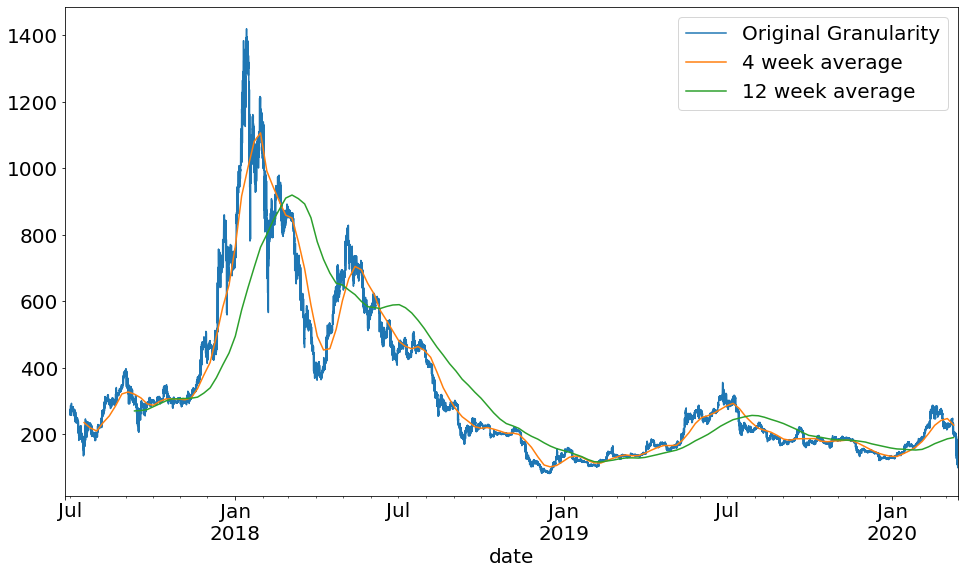

In [55]:
df.close.plot(label='Original Granularity')
df.resample('W').mean().close.rolling(4).mean().plot(label='4 week average')
df.resample('W').mean().close.rolling(12).mean().plot(label='12 week average')
plt.legend()
plt.show()

### How about Lagging or Leading the data?

* `.shift`: move the data backwards and forwards by a given amount
* `.diff`: find the difference with the previous observation (or a specified further back observation)

In [56]:
daily_df = daily_df[['volume', 'close']]
daily_df

,volume,close
date,,
2017-07-01,2.198771e+06,265.284615
2017-07-02,2.177595e+06,269.782500
2017-07-03,1.459015e+06,278.882083
2017-07-04,1.254579e+06,276.743333
2017-07-05,1.797923e+06,265.025833
...,...,...
2020-03-09,3.804752e+06,200.818333
2020-03-10,1.553063e+06,201.577500
2020-03-11,1.894868e+06,195.910417


In [57]:
daily_df['shift_by_one'] = daily_df.close.shift(1)
daily_df

,volume,close,shift_by_one
date,,,
2017-07-01,2.198771e+06,265.284615,NaN
2017-07-02,2.177595e+06,269.782500,265.284615
2017-07-03,1.459015e+06,278.882083,269.782500
2017-07-04,1.254579e+06,276.743333,278.882083
2017-07-05,1.797923e+06,265.025833,276.743333
...,...,...,...
2020-03-09,3.804752e+06,200.818333,222.555000
2020-03-10,1.553063e+06,201.577500,200.818333
2020-03-11,1.894868e+06,195.910417,201.577500


In [58]:
daily_df.close.shift(-1)

date
2017-07-01    269.782500
2017-07-02    278.882083
2017-07-03    276.743333
2017-07-04    265.025833
2017-07-05    266.480000
                 ...    
2020-03-09    201.577500
2020-03-10    195.910417
2020-03-11    152.763333
2020-03-12    124.060476
2020-03-13           NaN
Freq: D, Name: close, Length: 987, dtype: float64

In [59]:
daily_df['diff(1)'] = daily_df.close.diff(1)
daily_df['other_diff'] = daily_df.close - daily_df['shift_by_one']
daily_df

,volume,close,shift_by_one,diff(1),other_diff
date,,,,,
2017-07-01,2.198771e+06,265.284615,NaN,NaN,NaN
2017-07-02,2.177595e+06,269.782500,265.284615,4.497885,4.497885
2017-07-03,1.459015e+06,278.882083,269.782500,9.099583,9.099583
2017-07-04,1.254579e+06,276.743333,278.882083,-2.138750,-2.138750
2017-07-05,1.797923e+06,265.025833,276.743333,-11.717500,-11.717500
...,...,...,...,...,...
2020-03-09,3.804752e+06,200.818333,222.555000,-21.736667,-21.736667
2020-03-10,1.553063e+06,201.577500,200.818333,0.759167,0.759167
2020-03-11,1.894868e+06,195.910417,201.577500,-5.667083,-5.667083


### Let's use shift to answer a question: What is the yearly rate of return or return on investment (ROI)?

### Incoming math warning!

![Math gif](https://media4.giphy.com/media/DHqth0hVQoIzS/giphy.gif?cid=ecf05e47ciwxjpj7j3mkqv6dxplynda0k44lru3atznbajs1&rid=giphy.gif&ct=g)

#### How do we calculate ROI?

`yearly_rate_return` = (`where_we_are_today` - `where_we_were_a_year_ago`  ) / `where_we_were_a_year_ago`

#### Simpler Example

If I buy a rubber ducky for 200 dollars and sell it for 100 dollars after one year, what is my ROI?

In [60]:
where_we_were_a_year_ago = 200
where_we_are_today = 100
((where_we_are_today - where_we_were_a_year_ago) / where_we_were_a_year_ago) * 100

-50.0

#### Let's apply the same process to our data

In [61]:
where_we_were_a_year_ago = daily_df.close.shift(365)
where_we_were_a_year_ago

date
2017-07-01           NaN
2017-07-02           NaN
2017-07-03           NaN
2017-07-04           NaN
2017-07-05           NaN
                 ...    
2020-03-09    134.920000
2020-03-10    132.684167
2020-03-11    131.779167
2020-03-12    131.479583
2020-03-13    131.275417
Freq: D, Name: close, Length: 987, dtype: float64

In [63]:
daily_df['a_year_ago'] = where_we_were_a_year_ago
daily_df

,volume,close,shift_by_one,diff(1),other_diff,a_year_ago
date,,,,,,
2017-07-01,2.198771e+06,265.284615,NaN,NaN,NaN,NaN
2017-07-02,2.177595e+06,269.782500,265.284615,4.497885,4.497885,NaN
2017-07-03,1.459015e+06,278.882083,269.782500,9.099583,9.099583,NaN
2017-07-04,1.254579e+06,276.743333,278.882083,-2.138750,-2.138750,NaN
2017-07-05,1.797923e+06,265.025833,276.743333,-11.717500,-11.717500,NaN
...,...,...,...,...,...,...
2020-03-09,3.804752e+06,200.818333,222.555000,-21.736667,-21.736667,134.920000
2020-03-10,1.553063e+06,201.577500,200.818333,0.759167,0.759167,132.684167
2020-03-11,1.894868e+06,195.910417,201.577500,-5.667083,-5.667083,131.779167


In [64]:
daily_df.loc['2019-03-14']

volume          244101.443333
close              131.275417
shift_by_one       131.479583
diff(1)             -0.204167
other_diff          -0.204167
a_year_ago         658.033333
Name: 2019-03-14 00:00:00, dtype: float64

In [65]:
where_we_were_a_year_ago = daily_df.close.shift(365)
where_we_are_today = daily_df.close

roi_series = ((where_we_are_today - where_we_were_a_year_ago) / where_we_were_a_year_ago) * 100
roi_series

date
2017-07-01          NaN
2017-07-02          NaN
2017-07-03          NaN
2017-07-04          NaN
2017-07-05          NaN
                ...    
2020-03-09    48.842524
2020-03-10    51.922799
2020-03-11    48.665697
2020-03-12    16.187875
2020-03-13    -5.496033
Freq: D, Name: close, Length: 987, dtype: float64

#### And now let's graph it out

Text(0.5, 1.0, '1-Year Rate of return on ETH')

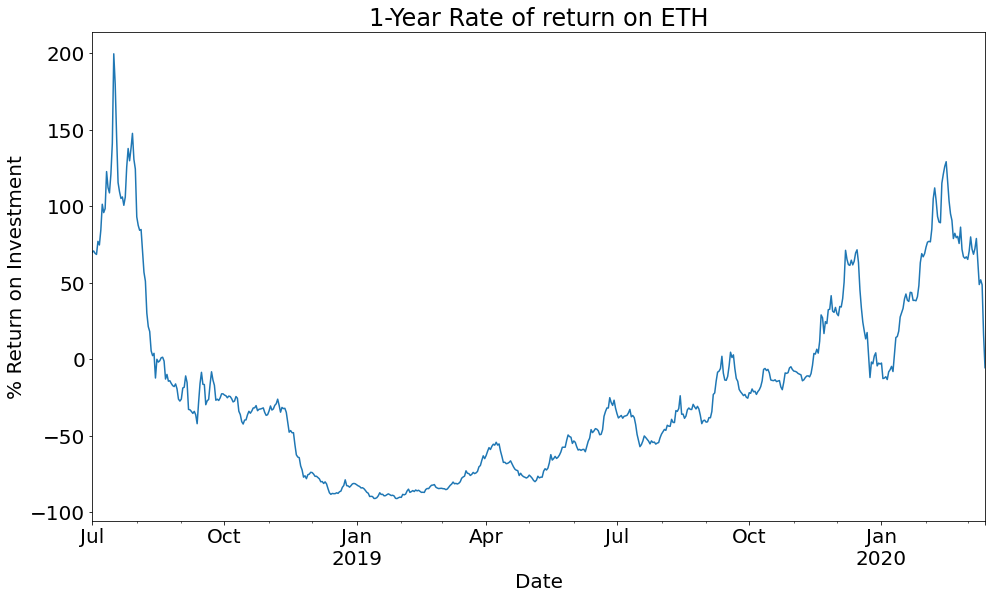

In [66]:
roi_series.dropna().plot()
plt.ylabel('% Return on Investment')
plt.xlabel('Date')
plt.title('1-Year Rate of return on ETH')

<AxesSubplot:xlabel='date'>

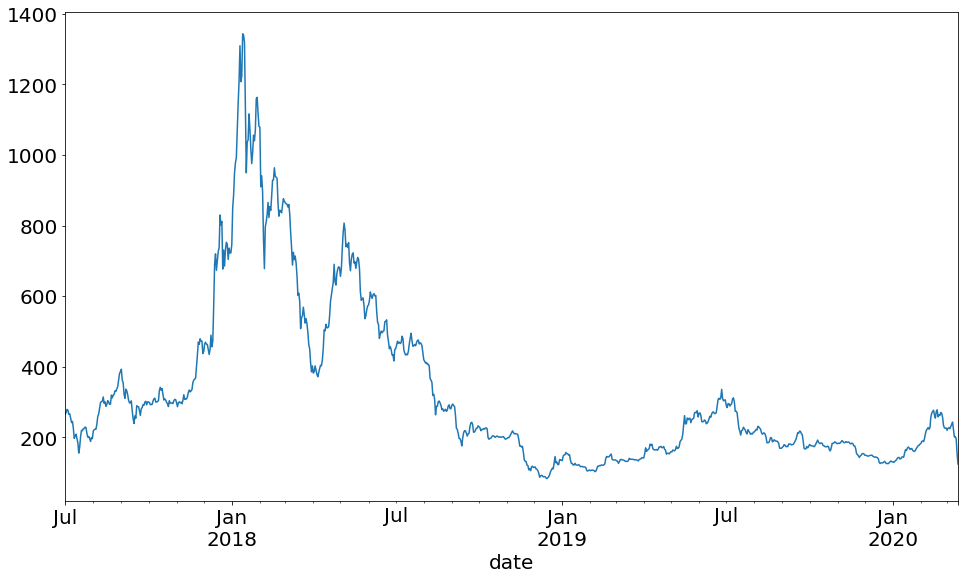

In [67]:
daily_df.close.plot()

### Time Zones

#### Timestamp with no timezone

In [68]:
t = pd.Timestamp('2020-04-14 10:25:25')
t

Timestamp('2020-04-14 10:25:25')

#### Specifying the timezone

In [69]:
t1 = pd.Timestamp('2020-04-14 10:25:25', tz='Us/Central')
t1

Timestamp('2020-04-14 10:25:25-0500', tz='US/Central')

#### Convert to a different timezone

In [70]:
t1 = t1.tz_convert(tz='Asia/tokyo')
t1

Timestamp('2020-04-15 00:25:25+0900', tz='Asia/Tokyo')

### Timedelta

In [71]:
t

Timestamp('2020-04-14 10:25:25')

In [72]:
t + pd.Timedelta('1d')

Timestamp('2020-04-15 10:25:25')

#### What if I need the time right `now`?

In [73]:
now = pd.Timestamp.now()
now

Timestamp('2022-08-10 12:40:24.982952')

#### Now let's to some time math!

In [74]:
time_since_t = now - t
time_since_t

Timedelta('848 days 02:14:59.982952')

### What if we just want to return the days?

In [75]:
pd.Timedelta('1d')

Timedelta('1 days 00:00:00')

In [76]:
time_since_t // pd.Timedelta('1d')

848

#### Simpler way

In [77]:
time_since_t.days

848

#### but if we want total seconds then we need to do the math

In [78]:
days_in_seconds = time_since_t.days * 24 * 60 * 60

seconds_in_timepart = time_since_t.seconds

days_in_seconds + seconds_in_timepart

73275299

#### So know timedelta math becomes the simplier way

In [79]:
time_since_t // pd.Timedelta('1s')

73275299

#### Takeaway: Use whichever method gets you answer for you

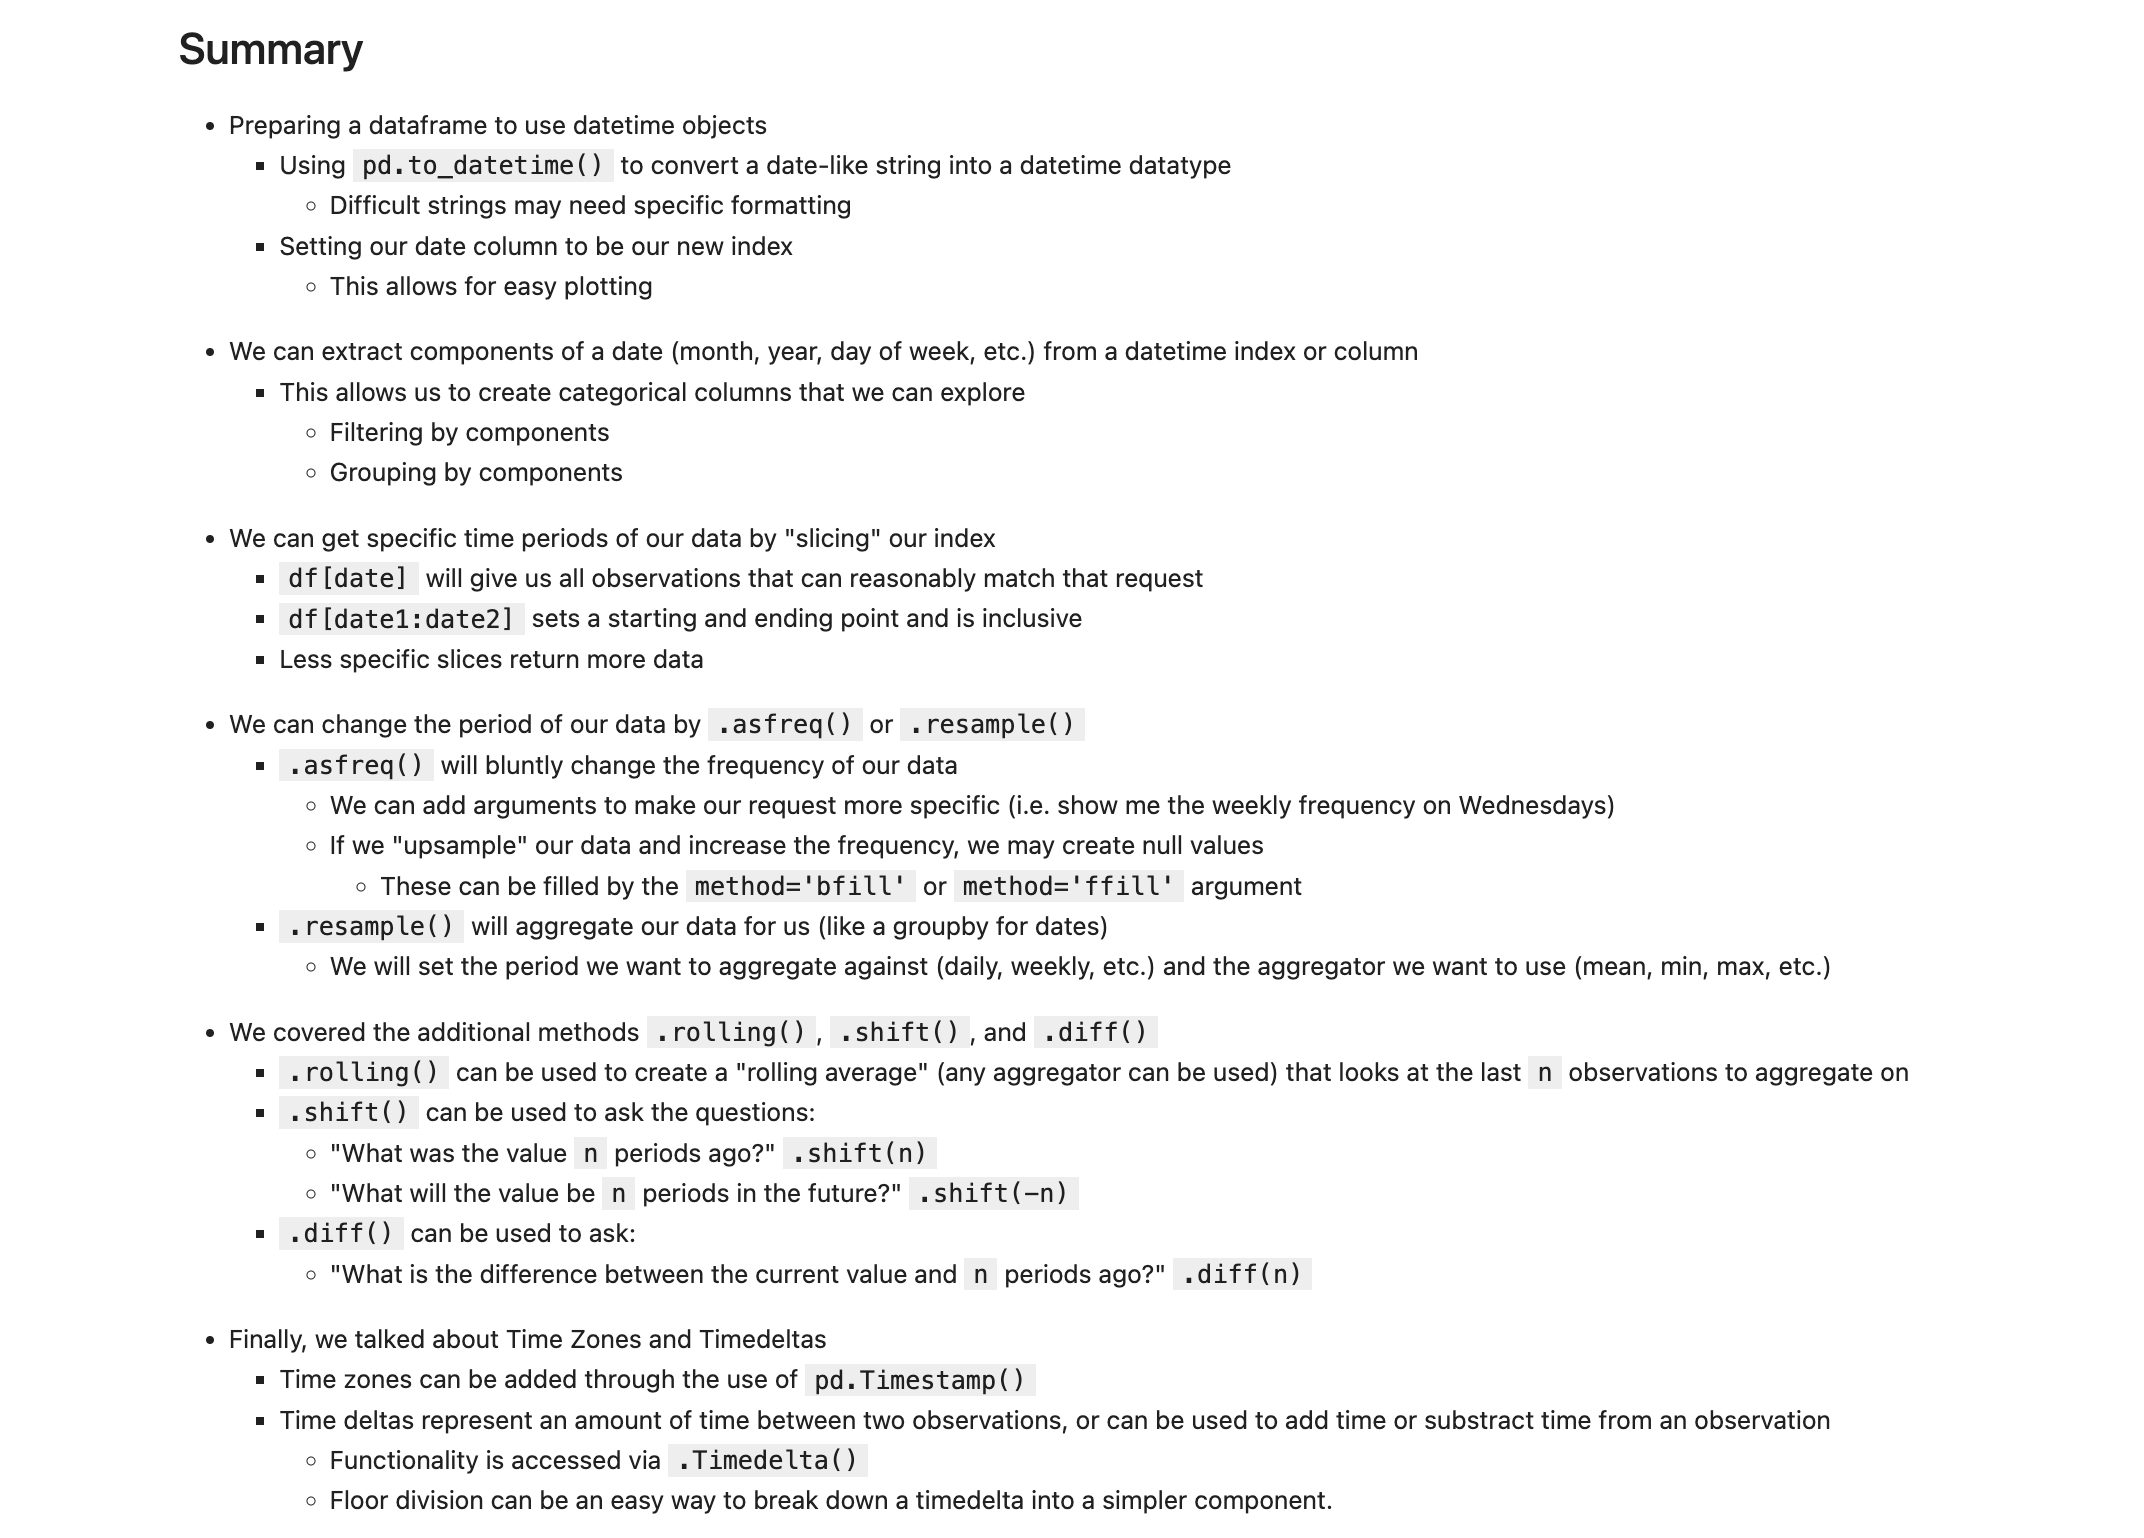